# **Capstone 3**

## **Business Problem Understanding**

## Business Problem Understanding

Industri telekomunikasi merupakan industri dengan model bisnis berbasis langganan (*subscription-based*), di mana keberlangsungan perusahaan sangat bergantung pada kemampuan mempertahankan pelanggan dalam jangka panjang. Salah satu tantangan utama yang dihadapi perusahaan telekomunikasi adalah tingginya tingkat *customer churn*, yaitu kondisi ketika pelanggan berhenti menggunakan layanan dan berpindah ke kompetitor.

Customer churn tidak hanya berdampak pada penurunan pendapatan, tetapi juga menimbulkan kerugian bisnis yang signifikan karena biaya untuk memperoleh pelanggan baru (*Customer Acquisition Cost*) umumnya jauh lebih besar dibandingkan biaya untuk mempertahankan pelanggan yang sudah ada. Oleh karena itu, kemampuan perusahaan dalam mengidentifikasi pelanggan yang berpotensi churn menjadi sangat krusial.

Dengan memanfaatkan data historis pelanggan dan pendekatan *machine learning*, perusahaan dapat membangun sistem prediksi churn sebagai *early warning system*. Sistem ini diharapkan mampu membantu perusahaan mendeteksi pelanggan berisiko churn lebih dini sehingga tindakan preventif, seperti program retensi, promosi, atau peningkatan layanan, dapat dilakukan secara tepat waktu untuk meminimalkan kehilangan pelanggan.


## Metric Evaluation

Dalam permasalahan *customer churn*, terdapat dua jenis kesalahan prediksi utama, yaitu:

- **False Positive (Type I Error)**  
  Pelanggan yang sebenarnya tidak churn tetapi diprediksi churn oleh model.  
  **Konsekuensi:** Pemberian program retensi yang tidak diperlukan sehingga menimbulkan biaya tambahan.

- **False Negative (Type II Error)**  
  Pelanggan yang sebenarnya churn tetapi tidak terdeteksi oleh model.  
  **Konsekuensi:** Kehilangan pelanggan tanpa intervensi, yang berdampak pada penurunan pendapatan serta peningkatan biaya akuisisi pelanggan baru.

Berdasarkan dampak bisnis tersebut, kesalahan **False Negative memiliki konsekuensi yang lebih besar** dibandingkan False Positive. Oleh karena itu, tujuan utama pengembangan model adalah meminimalkan False Negative dengan meningkatkan kemampuan model dalam mendeteksi pelanggan yang berpotensi churn.

Dengan pertimbangan tersebut, **metrik evaluasi utama yang digunakan adalah F2-score**, karena memberikan bobot yang lebih besar pada *recall* dibandingkan *precision*. Penggunaan F2-score memastikan bahwa model lebih sensitif dalam mendeteksi pelanggan berisiko churn, meskipun harus mengorbankan sebagian tingkat precision.


Industri telekomunikasi merupakan industri dengan model bisnis berbasis langganan (subscription-based), di mana keberlangsungan perusahaan sangat bergantung pada kemampuan mempertahankan pelanggan dalam jangka panjang. Salah satu tantangan utama yang dihadapi perusahaan telekomunikasi adalah tingginya tingkat customer churn, yaitu kondisi ketika pelanggan berhenti menggunakan layanan yang diberikan.

Customer churn tidak hanya berdampak pada penurunan pendapatan, tetapi juga menimbulkan kerugian bisnis yang signifikan karena perusahaan harus mengeluarkan biaya tambahan untuk mengakuisisi pelanggan baru (Customer Acquisition Cost). Dalam banyak kasus, biaya untuk memperoleh pelanggan baru jauh lebih besar dibandingkan biaya untuk mempertahankan pelanggan yang sudah ada melalui program retensi.

Oleh karena itu, perusahaan membutuhkan pendekatan yang mampu mengidentifikasi pelanggan yang berpotensi churn secara lebih dini. Dengan memanfaatkan data historis pelanggan dan pendekatan machine learning, perusahaan dapat membangun sistem prediksi churn sebagai early warning system. Sistem ini diharapkan dapat membantu perusahaan mengambil tindakan intervensi yang tepat dan tepat waktu, sehingga risiko kehilangan pelanggan dan dampak finansial akibat churn dapat diminimalkan.

### Cost–Benefit Matrix (Customer Churn – Telco)

| Actual \ Predicted | Predicted Churn | Predicted Not Churn |
|-------------------|-----------------|---------------------|
| **Actual Churn** | **True Positive (TP)**  <br> Pelanggan churn terdeteksi <br> Retensi dilakukan <br> **Cost: Biaya retensi (± Rp50.000)** | **False Negative (FN)** <br> Pelanggan churn tidak terdeteksi <br> Kehilangan pelanggan <br> **Cost: Kehilangan pendapatan + CAC (± Rp400.000)** |
| **Actual Not Churn** | **False Positive (FP)** <br> Retensi tidak diperlukan <br> **Cost: Biaya retensi (± Rp50.000)** | **True Negative (TN)** <br> Tidak ada tindakan <br> **Cost: Rp0** |


Nilai biaya yang digunakan dalam analisis ini merupakan asumsi konservatif yang didasarkan pada praktik umum industri telekomunikasi dan digunakan untuk menggambarkan perbedaan relatif dampak bisnis dari masing-masing jenis kesalahan prediksi.

### Data Understanding

Dataset yang digunakan dalam penelitian ini merupakan dataset **Telco Customer Churn**

Setiap baris data merepresentasikan satu pelanggan dengan informasi terkait karakteristik
pelanggan, layanan yang digunakan, serta status churn.

### Attribute Information


| Attribute | Data Type, Length | Description |
| --- | --- | --- |
| Dependents  | Text | Whether the customer has dependents or not. |
| tenure | Integer | Number of months the customer has stayed with the company |
| OnlineSecurity | Text | Indicates if the customer subscribes to an additional online security service provided by the company. |
| OnlineBackup | Text | Indicates if the customer subscribes to an additional online backup service provided by the company.Gender of candidate |
| InternetService  | Text | Indicates if the customer subscribes to Internet service with the company.|
| DeviceProtection | Text | Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company |
| TechSupport | Text | Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times. |
| Contract | Text | Indicates the customer’s current contract type. |
| PaperlessBilling | Text | Indicates if the customer has chosen paperless billing. |
| MonthlyCharges | Float | 	Indicates the customer’s current total monthly charge for all their services from the company. |
| Churn (Target) | Text |Whether the customer churns or not.( Yes = the customer left the company this quarter. No = the customer remained with the company.) |



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTENC
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier

from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, f1_score
from sklearn.metrics import confusion_matrix, recall_score, fbeta_score, make_scorer

from imblearn.pipeline import Pipeline
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

## **Data Preparation**

In [3]:
path = "D:\\Purwadhika\\Capstone\\Capstone 3\\"

df = pd.read_csv("data_telco_customer_churn.csv")
df

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No
...,...,...,...,...,...,...,...,...,...,...,...
4925,No,15,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,103.45,No
4926,Yes,10,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,91.10,No
4927,No,58,No internet service,No internet service,No,No internet service,No internet service,Two year,No,20.75,No
4928,No,1,No,No,Fiber optic,No,No,Month-to-month,Yes,69.75,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB


In [5]:
# Churn imbalance
print(df['Churn'].value_counts())
print()
print(df['Churn'].value_counts()/len(df['Churn'])*100)

Churn
No     3614
Yes    1316
Name: count, dtype: int64

Churn
No     73.306288
Yes    26.693712
Name: count, dtype: float64


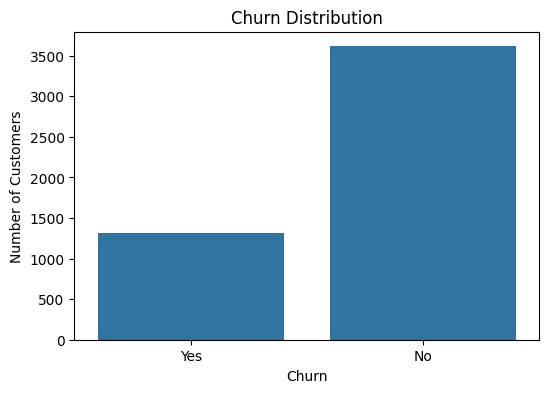

In [6]:
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.show()

In [7]:
# F2 score (Karena cost dari FN (diprediksi tidak churn, padahal aslinya churn) lebih tinggi dari pada FP (diprediksi churn, padahal aslinya tidak churn))
f2_score = make_scorer(fbeta_score, beta=2)

In [8]:
# ccek apakah ada data yang hilang
df.isna().sum()

Dependents          0
tenure              0
OnlineSecurity      0
OnlineBackup        0
InternetService     0
DeviceProtection    0
TechSupport         0
Contract            0
PaperlessBilling    0
MonthlyCharges      0
Churn               0
dtype: int64

In [9]:
# cek data apakah ada duplicate 
df.duplicated().sum()

77

In [10]:
# membersihkan duplicates
df=df.drop_duplicates()

In [11]:
df['Churn'] = np.where(df['Churn']=='Yes', 1, 0)

In [12]:
df['Churn']

0       1
1       0
2       1
3       0
4       0
       ..
4925    0
4926    0
4927    0
4928    1
4929    0
Name: Churn, Length: 4853, dtype: int32

In [13]:
# Julah unique sample disetiap kolom
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Dependents,object,0,0.0,2,"[Yes, No]"
1,tenure,int64,0,0.0,73,"[13, 40]"
2,OnlineSecurity,object,0,0.0,3,"[Yes, No]"
3,OnlineBackup,object,0,0.0,3,"[Yes, No internet service]"
4,InternetService,object,0,0.0,3,"[No, Fiber optic]"
5,DeviceProtection,object,0,0.0,3,"[No internet service, Yes]"
6,TechSupport,object,0,0.0,3,"[No internet service, No]"
7,Contract,object,0,0.0,3,"[One year, Two year]"
8,PaperlessBilling,object,0,0.0,2,"[Yes, No]"
9,MonthlyCharges,float64,0,0.0,1422,"[103.8, 29.8]"


In [14]:
# Cek Value Unik tiap kolom
pd.set_option('display.max_colwidth', None)

cols = df.columns
res = []

for i in cols:
    res.append([i, df[i].unique()])

pd.DataFrame(res, columns=['Nama Kolom', 'Value Unik'])


,Nama Kolom,Value Unik
0,Dependents,"[Yes, No]"
1,tenure,"[9, 14, 64, 72, 3, 40, 17, 11, 8, 47, 18, 5, 1, 48, 13, 58, 7, 4, 70, 34, 31, 37, 15, 71, 10, 43, 22, 33, 69, 54, 63, 55, 66, 56, 32, 26, 24, 2, 51, 23, 49, 28, 36, 45, 42, 6, 61, 59, 67, 65, 0, 16, 52, 41, 25, 62, 20, 50, 30, 60, 19, 35, 57, 27, 44, 53, 12, 46, 39, 29, 38, 68, 21]"
2,OnlineSecurity,"[No, Yes, No internet service]"
3,OnlineBackup,"[No, Yes, No internet service]"
4,InternetService,"[DSL, Fiber optic, No]"
5,DeviceProtection,"[Yes, No internet service, No]"
6,TechSupport,"[Yes, No, No internet service]"
7,Contract,"[Month-to-month, Two year, One year]"
8,PaperlessBilling,"[Yes, No]"
9,MonthlyCharges,"[72.9, 82.65, 47.85, 69.65, 23.6, 74.55, 19.7, 44.05, 73.5, 40.3, 33.6, 96.25, 70.45, 30.55, 44.8, 20.0, 81.5, 94.35, 35.3, 50.7, 106.05, 56.3, 20.65, 98.9, 40.2, 81.2, 19.45, 116.1, 55.2, 94.45, 84.85, 19.6, 79.0, 74.7, 30.4, 55.8, 104.5, 70.55, 55.25, 96.65, 88.85, 109.25, 104.75, 74.4, 79.4, 74.1, 73.05, 94.6, 70.35, 79.6, 79.5, 90.7, 81.0, 87.75, 118.65, 24.8, 105.25, 57.8, 19.0, 25.7, 54.2, 44.85, 19.95, 81.05, 20.35, 85.25, 67.45, 100.3, 20.95, 105.2, 26.35, 82.15, 102.6, 106.15, 23.95, 115.8, 66.85, 90.35, 89.85, 73.35, 104.45, 35.45, 88.4, 70.5, 25.1, 39.0, 83.25, 74.3, 54.3, 50.45, 86.0, 19.55, 103.5, 91.7, 64.85, 99.65, 68.75, 106.25, 75.9, 94.4, ...]"


In [15]:
for x in df.columns:
    total_unique_values = len(df[x].unique())
    print(f"Unique value of {x} is {total_unique_values}")

Unique value of Dependents is 2
Unique value of tenure is 73
Unique value of OnlineSecurity is 3
Unique value of OnlineBackup is 3
Unique value of InternetService is 3
Unique value of DeviceProtection is 3
Unique value of TechSupport is 3
Unique value of Contract is 3
Unique value of PaperlessBilling is 2
Unique value of MonthlyCharges is 1422
Unique value of Churn is 2


In [16]:
# mengecek penggunaan layanan `OnlineSecurity, OnlineBackup, DeviceProtection` dan Tech Support
df_no_internet = df[df['InternetService']=='No']

listItem = []
for col in df_no_internet.columns[2:7] :
    listItem.append( [col, df_no_internet[col].nunique(), df_no_internet.sort_values(col)[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Values'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Values
0,OnlineSecurity,1,[No internet service]
1,OnlineBackup,1,[No internet service]
2,InternetService,1,[No]
3,DeviceProtection,1,[No internet service]
4,TechSupport,1,[No internet service]


In [17]:
# mengubah 'No internet service' menjadi 'No' pada dataframe
df = df.replace('No internet service','No')

Mengecek nilai unik pada layanan `OnlineSecurity, OnlineBackup, DeviceProtection` dan `TechSupport` ketika 'No' InternetService

In [18]:
listItem = []
for col in df.columns[2:7] :
    listItem.append( [col, df[col].nunique(), df.sort_values(col)[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Values'],
                     data=listItem)


tabel1Desc

,Column Name,Number of Unique,Unique Values
0,OnlineSecurity,2,"[No, Yes]"
1,OnlineBackup,2,"[No, Yes]"
2,InternetService,3,"[DSL, Fiber optic, No]"
3,DeviceProtection,2,"[No, Yes]"
4,TechSupport,2,"[No, Yes]"


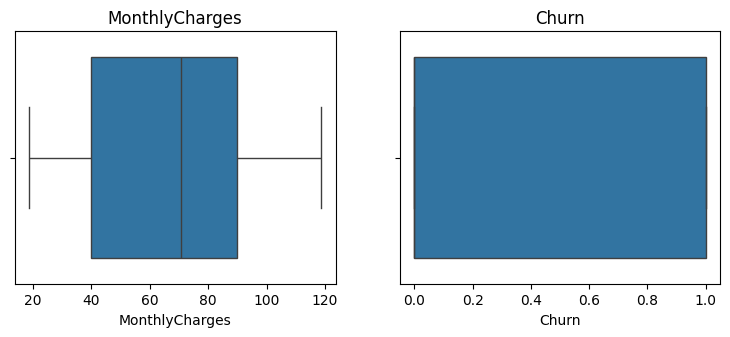

In [19]:
# Cek outliers

col_names = df.drop(columns=['tenure']).describe().columns

plot_number = 1

plt.figure(figsize=(24,19))
for kolom in col_names:
    plt.subplot(5,5, plot_number)
    sns.boxplot(data=df, x=kolom)
    plt.title(kolom)

    plot_number +=1

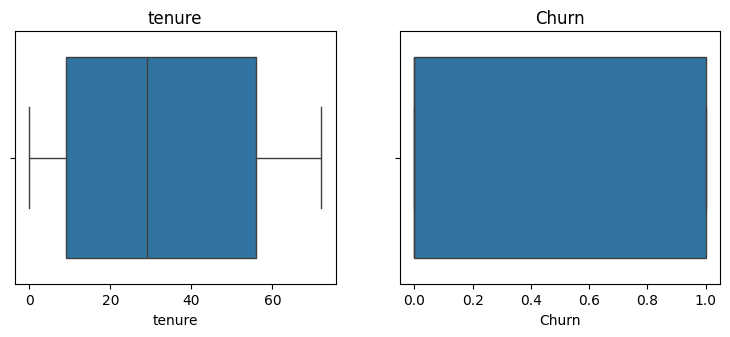

In [20]:
col_names = df.drop(columns=['MonthlyCharges']).describe().columns

plot_number = 1

plt.figure(figsize=(24,19))
for kolom in col_names:
    plt.subplot(5,5, plot_number)
    sns.boxplot(data=df, x=kolom)
    plt.title(kolom)

    plot_number +=1

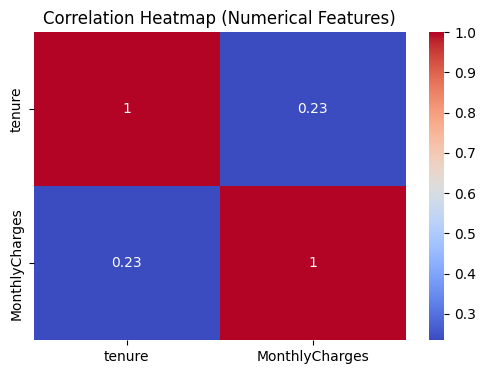

In [21]:
plt.figure(figsize=(6,4))
sns.heatmap(
    df[['tenure', 'MonthlyCharges']].corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title('Correlation Heatmap (Numerical Features)')
plt.show()


Data Preparation Summary

- Churn Distribution
Distribusi target menunjukkan bahwa dataset bersifat **imbalanced**, dengan sekitar **73% pelanggan tidak churn** dan **27% pelanggan churn**.  
Kondisi ini menunjukkan bahwa kesalahan **False Negative** (pelanggan churn tetapi diprediksi tidak churn) berpotensi memberikan dampak bisnis yang lebih besar dibandingkan False Positive.

- Data Quality Check
    Hasil pengecekan kualitas data menunjukkan bahwa:
    - Tidak terdapat missing values pada seluruh fitur
    - Ditemukan data duplikat yang kemudian dihapus untuk menjaga konsistensi data

- Feature Understanding
Pengecekan nilai unik pada setiap fitur dilakukan untuk memahami karakteristik data, khususnya pada fitur kategorikal.  
Hasil eksplorasi ini digunakan sebagai dasar dalam menentukan metode encoding pada tahap preprocessing.

- Handling ‘No Internet Service’
Beberapa fitur layanan seperti **OnlineSecurity, OnlineBackup, DeviceProtection, dan TechSupport** memiliki nilai *'No internet service'* ketika pelanggan tidak berlangganan internet.

Nilai tersebut diseragamkan menjadi *'No'* untuk:
    - Menghindari redundansi kategori
    - Menyederhanakan proses encoding
    - Menjaga interpretabilitas fitur

- Numerical Feature Analysis
Distribusi dan potensi outlier pada fitur numerik **tenure** dan **MonthlyCharges** dianalisis menggunakan boxplot.  
Selain itu, korelasi antar fitur numerik diperiksa dan menunjukkan korelasi yang relatif rendah, sehingga tidak terdapat indikasi multikolinearitas yang signifikan.

## **Preprocessing**

In [22]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [23]:
numerical_features = X.select_dtypes(include=['int64','float64']).columns
categorical_features = X.select_dtypes(include='object').columns

In [24]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

**Preprocessing**

Pada tahap preprocessing, dilakukan pemisahan fitur dan target, identifikasi tipe data,
serta transformasi fitur numerik dan kategorikal menggunakan StandardScaler dan
OneHotEncoder. Proses ini dirancang menggunakan ColumnTransformer untuk mencegah
data leakage dan memastikan konsistensi transformasi pada data training dan testing.


## **Modeling - Baseline Model**

In [26]:
pipe_logreg = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', LogisticRegression(max_iter=1000))
])

In [27]:
f2_scorer = make_scorer(fbeta_score, beta=2)

In [28]:
cv_f2 = cross_val_score(
    pipe_logreg,
    X_train,
    y_train,
    cv=5,
    scoring=f2_scorer
)

print("Mean F2-score:", cv_f2.mean())

Mean F2-score: 0.5368740459306921


**Modeling – Benchmark Model**

- Model baseline yang digunakan adalah Logistic Regression. Evaluasi awal dilakukan
menggunakan cross-validation dengan metrik F2-score untuk memastikan model memiliki
kemampuan recall yang baik dalam mendeteksi pelanggan churn.

- Berdasarkan hasil cross-validation menggunakan 5-fold CV, model Logistic Regression
memperoleh **mean F2-score sebesar 0.54**. Nilai ini digunakan sebagai baseline performa
model sebelum dilakukan proses hyperparameter tuning.

- Hasil ini menunjukkan bahwa model telah mampu menangkap sebagian pelanggan churn,
namun masih terdapat ruang perbaikan terutama dalam meningkatkan recall kelas churn.



## **Baseline Model Evaluation**

In [29]:
pipe_logreg.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['tenure', 'MonthlyCharges'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService',
       'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling'],
      dtype='object'))])),
                ('model', LogisticRegression(max_iter=1000))])

In [30]:
y_pred = pipe_logreg.predict(X_test)
y_prob = pipe_logreg.predict_proba(X_test)[:,1]

In [31]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[633,  80],
       [119, 139]], dtype=int64)

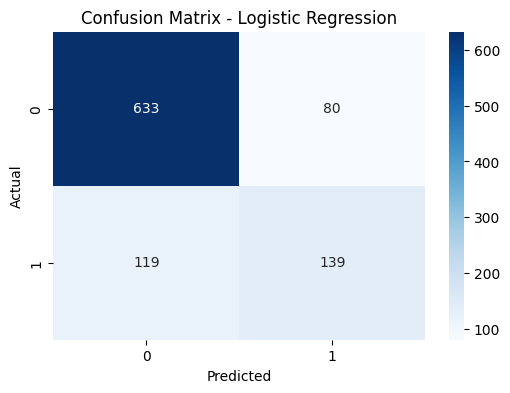

In [32]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       713
           1       0.63      0.54      0.58       258

    accuracy                           0.80       971
   macro avg       0.74      0.71      0.72       971
weighted avg       0.79      0.80      0.79       971



In [34]:
f2_test = fbeta_score(y_test, y_pred, beta=2)
print("F2-score (Test Set):", f2_test)


F2-score (Test Set): 0.5555555555555556


**Modeling Evaluation**
- Evaluasi awal dilakukan menggunakan 5-fold cross-validation dengan metrik F2-score.
Hasil ini digunakan sebagai **baseline performance** untuk membandingkan peningkatan performa model setelah dilakukan hyperparameter tuning.
Nilai F2-score baseline menunjukkan bahwa model masih memiliki ruang perbaikan, khususnya dalam meningkatkan recall pada kelas churn.

- Dalam permasalahan customer churn, terdapat dua jenis kesalahan prediksi utama, yaitu False Positive dan False Negative.
False Negative memiliki dampak bisnis yang lebih besar karena pelanggan yang benar-benar churn tidak terdeteksi oleh model dan akhirnya hilang tanpa intervensi.
Oleh karena itu, model difokuskan untuk meminimalkan False Negative, yang berarti meningkatkan kemampuan model dalam mendeteksi pelanggan churn.

- Berdasarkan pertimbangan tersebut, metric utama yang digunakan adalah F2-score, karena memberikan bobot yang lebih besar pada recall dibandingkan precision.
F2-score dipilih untuk memastikan model lebih sensitif dalam mendeteksi pelanggan yang berpotensi churn, meskipun harus mengorbankan sebagian precision.


## **Hyperparameter Tuning**

**Hyperparameter Tuning**

Hyperparameter tuning dilakukan menggunakan GridSearchCV untuk mengoptimalkan
parameter Logistic Regression dengan objective F2-score. Hasil tuning menunjukkan
peningkatan performa model dibandingkan baseline, khususnya dalam meningkatkan recall
kelas churn.


**Before Hyperparameter**

In [35]:
models = {
    'Logistic Regression': LogisticRegression(
        max_iter=1000,
        random_state=42
    ),
    'Gradient Boosting': GradientBoostingClassifier(
        random_state=42
    )
}

score_before = []

for name, model in models.items():
    pipe = Pipeline(steps=[
        ('preprocess', preprocessor),
        ('model', model)
    ])
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    f2 = fbeta_score(y_test, y_pred, beta=2)
    score_before.append(f2)

score_before_tuning = pd.DataFrame(
    score_before,
    index=models.keys(),
    columns=['F2-score']
)

score_before_tuning


,F2-score
Logistic Regression,0.555556
Gradient Boosting,0.506950


**After Hyperparameter**

In [36]:
param_grid = {
    'model__C': [0.01, 0.1, 1, 10],
    'model__penalty': ['l2'],
    'model__class_weight': [None, 'balanced'],
    'model__solver': ['liblinear']
}

f2_scorer = make_scorer(fbeta_score, beta=2)

grid_logreg = GridSearchCV(
    estimator=pipe_logreg,
    param_grid=param_grid,
    scoring=f2_scorer,
    cv=5,
    n_jobs=-1
)

grid_logreg.fit(X_train, y_train)

print("Best F2-score (CV):", grid_logreg.best_score_)
print("Best Parameters:", grid_logreg.best_params_)


Best F2-score (CV): 0.7147182951766268
Best Parameters: {'model__C': 1, 'model__class_weight': 'balanced', 'model__penalty': 'l2', 'model__solver': 'liblinear'}


In [37]:
best_model = grid_logreg.best_estimator_

y_pred_best = best_model.predict(X_test)

f2_test = fbeta_score(y_test, y_pred_best, beta=2)
print("F2-score (Test Set):", f2_test)


F2-score (Test Set): 0.7237299930410578


In [38]:
comparison = pd.DataFrame({
    'Before Tuning (F2)': score_before_tuning.loc['Logistic Regression', 'F2-score'],
    'After Tuning (F2)': f2_test
}, index=['Logistic Regression'])

comparison


,Before Tuning (F2),After Tuning (F2)
Logistic Regression,0.555556,0.72373


## **Evaluasi Model Hasil Tuning**

In [39]:
best_model = grid_logreg.best_estimator_

y_pred_best = best_model.predict(X_test)


print(classification_report(y_test, y_pred_best))
print("F2-score (Test Set):", fbeta_score(y_test, y_pred_best, beta=2))


              precision    recall  f1-score   support

           0       0.91      0.72      0.81       713
           1       0.51      0.81      0.63       258

    accuracy                           0.75       971
   macro avg       0.71      0.76      0.72       971
weighted avg       0.81      0.75      0.76       971

F2-score (Test Set): 0.7237299930410578


## **Performance Comparison (Recall Churn)**

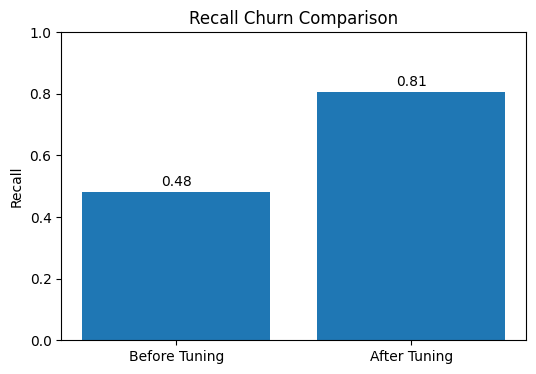

In [ ]:
# === Recall BEFORE tuning ===
report_before = classification_report(
    y_test,
    y_pred,           # prediction baseline
    output_dict=True
)
recall_before = report_before['1']['recall']

# === Recall AFTER tuning ===
report_after = classification_report(
    y_test,
    y_pred_best,      # prediction model hasil tuning
    output_dict=True
)
recall_after = report_after['1']['recall']

# === Bar Chart ===
labels = ['Before Tuning', 'After Tuning']
recall_values = [recall_before, recall_after]

plt.figure(figsize=(6,4))
plt.bar(labels, recall_values)
plt.ylim(0,1)
plt.ylabel('Recall')
plt.title('Recall Churn Comparison')

for i, v in enumerate(recall_values):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center')

plt.show()


**Performance Comparison – Recall Churn**

Untuk mengukur efektivitas model dalam mendeteksi pelanggan churn, dilakukan
perbandingan nilai recall pada kelas churn sebelum dan sesudah hyperparameter tuning.

Recall dipilih karena kesalahan False Negative memiliki dampak bisnis yang lebih besar,
yaitu pelanggan churn yang tidak terdeteksi dan berpotensi hilang tanpa intervensi.


**Evaluasi Model Setelah Hyperparameter Tuning**

Berdasarkan hasil hyperparameter tuning menggunakan GridSearchCV dengan metrik F2-score, model Logistic Regression menunjukkan peningkatan performa yang signifikan. Nilai F2-score pada data uji meningkat dari 0.56 pada model baseline menjadi 0.72 setelah dilakukan tuning.

Peningkatan ini terutama disebabkan oleh penggunaan parameter `class_weight='balanced'` yang membantu model lebih sensitif dalam mendeteksi pelanggan churn, sehingga recall pada kelas churn meningkat. Hasil ini menunjukkan bahwa proses hyperparameter tuning berhasil meningkatkan kemampuan model dalam mengidentifikasi pelanggan yang berpotensi churn.


## **Confusion Matrix**

In [41]:
cm = confusion_matrix(y_test, y_pred_best)
cm

array([[516, 197],
       [ 50, 208]], dtype=int64)

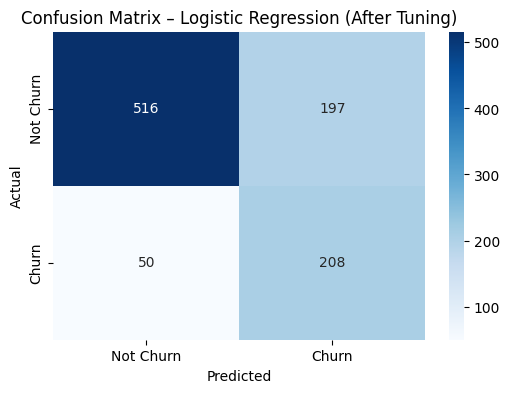

In [42]:
plt.figure(figsize=(6,4))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Not Churn', 'Churn'],
    yticklabels=['Not Churn', 'Churn']
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix – Logistic Regression (After Tuning)')
plt.show()


**Confusion Matrix – Logistic Regression (After Hyperparameter Tuning)**

Confusion matrix digunakan untuk mengevaluasi performa model dalam mengklasifikasikan pelanggan churn dan non-churn setelah dilakukan hyperparameter tuning.

Hasil confusion matrix menunjukkan bahwa model berhasil mengidentifikasi 208 pelanggan churn dengan benar (True Positive), sementara hanya 50 pelanggan churn yang tidak terdeteksi (False Negative). Jumlah False Negative yang relatif rendah menunjukkan bahwa model memiliki kemampuan recall yang baik dalam mendeteksi pelanggan yang berpotensi churn.

Meskipun terdapat 197 False Positive, kondisi ini masih dapat diterima karena biaya bisnis dari False Negative (kehilangan pelanggan churn tanpa intervensi) lebih besar dibandingkan biaya menghubungi pelanggan yang sebenarnya tidak churn. Hal ini sejalan dengan penggunaan metrik F2-score yang memberikan bobot lebih besar pada recall.


## Conclusion and Recommendation

### Conclusion

Berdasarkan hasil pemodelan yang telah dilakukan, Logistic Regression dipilih sebagai model baseline untuk memprediksi customer churn karena kesederhanaan dan kemampuannya dalam memberikan interpretasi yang jelas terhadap hasil klasifikasi. Evaluasi awal menggunakan metrik F2-score menunjukkan bahwa model baseline masih memiliki keterbatasan dalam mendeteksi pelanggan churn, khususnya pada aspek recall kelas churn.

Melalui proses hyperparameter tuning menggunakan GridSearchCV dengan objective F2-score, performa model mengalami peningkatan yang signifikan. Nilai F2-score pada data test meningkat dari 0.56 sebelum tuning menjadi 0.72 setelah tuning. Peningkatan ini menunjukkan bahwa model hasil tuning lebih efektif dalam meminimalkan kesalahan False Negative, sehingga lebih sensitif dalam mengidentifikasi pelanggan yang berpotensi churn.

Hasil evaluasi menggunakan confusion matrix dan classification report juga mengindikasikan adanya peningkatan recall pada kelas churn setelah dilakukan tuning, meskipun disertai dengan penurunan precision. Trade-off tersebut dapat diterima mengingat tujuan utama pengembangan model adalah mendeteksi sebanyak mungkin pelanggan berisiko churn agar intervensi bisnis dapat dilakukan lebih dini.


### Recommendation

Berdasarkan hasil pemodelan dan evaluasi yang telah dilakukan, berikut beberapa rekomendasi yang dapat diberikan:

1. **Implementasi Model sebagai Early Warning System**  
   Model hasil tuning dapat digunakan sebagai sistem peringatan dini untuk mengidentifikasi pelanggan dengan risiko churn tinggi, sehingga tim bisnis dapat melakukan intervensi lebih awal melalui program retensi yang tepat sasaran.

2. **Threshold Optimization**  
   Pada pengembangan selanjutnya, disarankan untuk melakukan penyesuaian threshold probabilitas prediksi guna menyeimbangkan precision dan recall sesuai dengan kebutuhan dan prioritas bisnis.

3. **Pengayaan Fitur (Feature Enrichment)**  
   Penambahan fitur berbasis perilaku pelanggan, seperti frekuensi penggunaan layanan, durasi penggunaan, atau interaksi dengan customer service, berpotensi meningkatkan performa model dalam mendeteksi churn.

4. **Cost-Sensitive Modeling**  
   Model dapat dikembangkan lebih lanjut dengan mempertimbangkan biaya bisnis dari setiap jenis kesalahan prediksi, sehingga penalti untuk False Negative dapat dimodelkan secara eksplisit.

5. **Evaluasi dan Retraining Model Secara Berkala**  
   Performa model perlu dipantau dan diperbarui secara berkala agar tetap relevan terhadap perubahan perilaku pelanggan dan dinamika bisnis.
